<a href="https://colab.research.google.com/github/dyinghorizon/VR_Assignment1_Nishad_MT2024102/blob/main/Coin_Detection_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import os
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2 as cv
from skimage.filters import sobel
from skimage.filters import gaussian

In [2]:
#Helper Functions

def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

def plot_comparison(original, filtered, title_filt):

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 9), sharex= True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filt)
  ax2.axis('off')

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [3]:
# Load The Image

filename = '/content/coins2.jpg'
coins = ski.io.imread(filename)

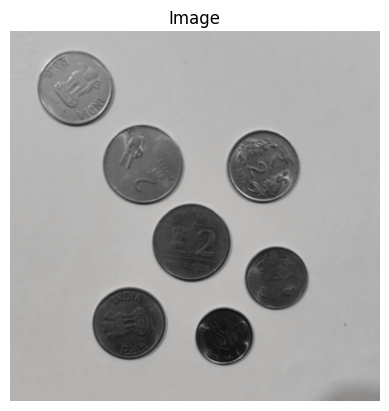

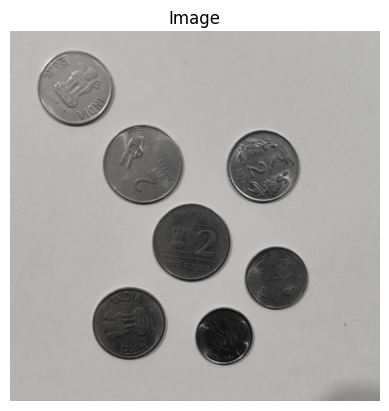

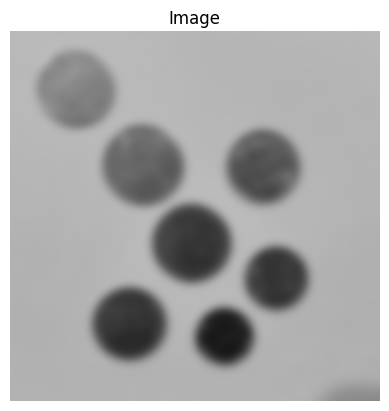

In [4]:
# Denoising the image for better edge detection

from skimage.filters import gaussian

denoised_coins_for_edge_detection = gaussian(coins, sigma=2)
denoised_coins = gaussian(coins, sigma=3)
denoised_coins_for_segmentation = gaussian(coins, sigma=25)
show_image(denoised_coins)
show_image(denoised_coins_for_edge_detection)
show_image(denoised_coins_for_segmentation)

In [5]:
# Converting RGB image to grayscale

from skimage import color

gray_coins = color.rgb2gray(denoised_coins)
gray_coins_for_edge_detection = color.rgb2gray(denoised_coins_for_edge_detection)
gray_coins_for_segmentation = color.rgb2gray(denoised_coins_for_segmentation)

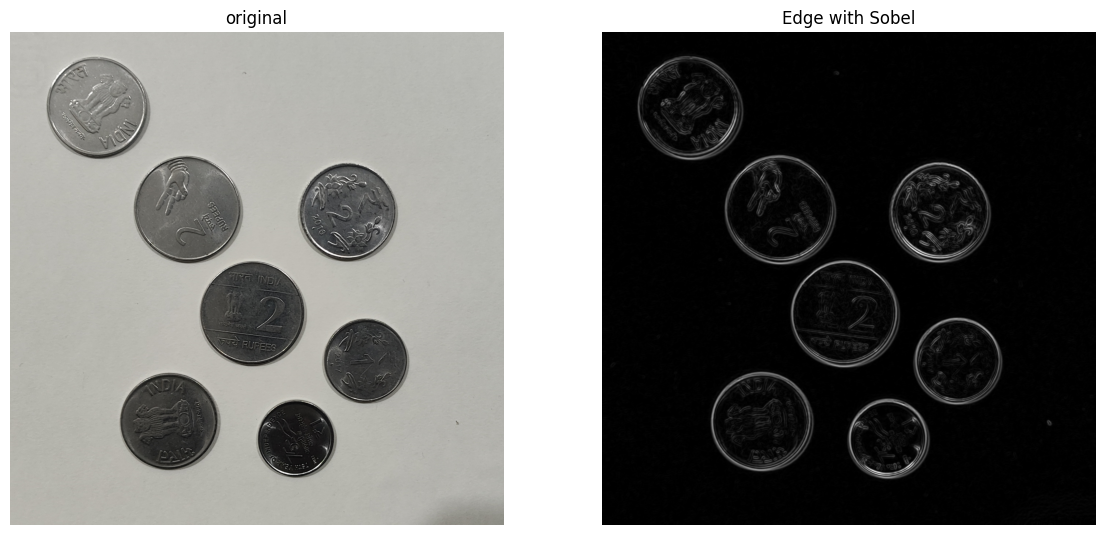

In [6]:
# edge_sobel = sobel(gray_coins)
edge_sobel = sobel(gray_coins)

plot_comparison(coins, edge_sobel, "Edge with Sobel")

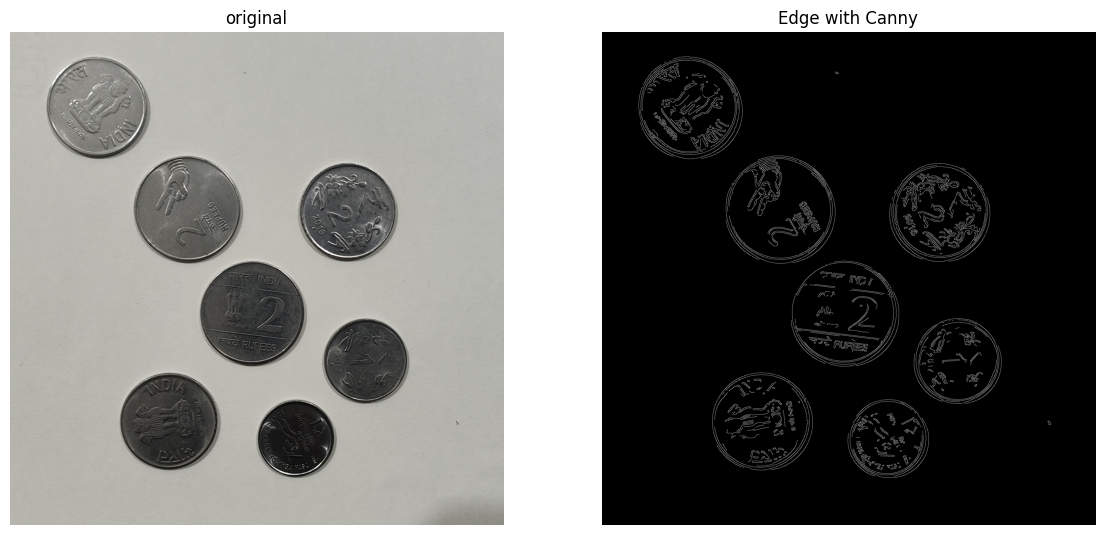

In [7]:
from skimage.feature import canny

canny_edge = canny(gray_coins_for_edge_detection, sigma=0.002)

plot_comparison(coins, canny_edge, "Edge with Canny")

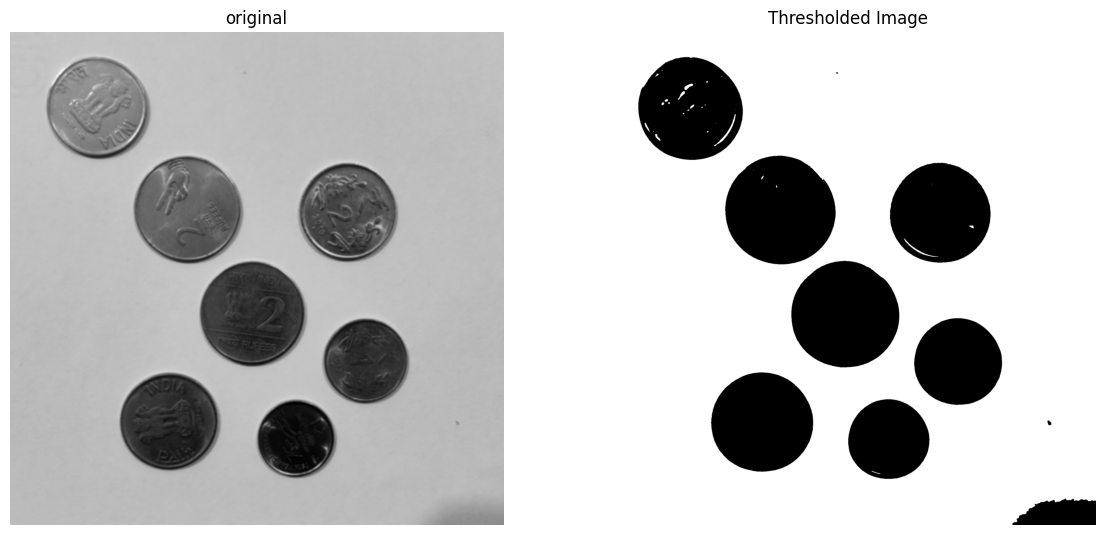

In [8]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(gray_coins_for_segmentation)

# Apply thresholding to the image
binary_global = gray_coins > 0.65

plot_comparison(gray_coins, binary_global, 'Thresholded Image')

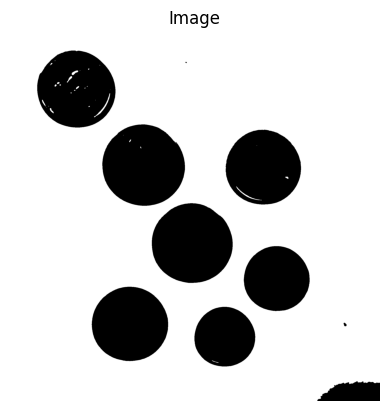

In [9]:
show_image(binary_global)

In [10]:
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary_global, 0.8)

Number of Coins: 7. 


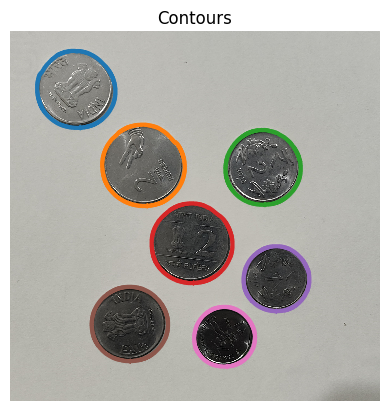

In [11]:
# Set 1200 as the minimum size of the ring
min_ring_size = 1200

# Count ring in contours excluding smaller than given shape size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] > min_ring_size]

# Shows all contours found
show_image_contour(coins, dots_contours)

# Print the number of coins
print("Number of Coins: {}. ".format(len(dots_contours)))